In [1]:
from preamble import *

## 선형모델
### 선형 회귀 모델

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


w[0]: 0.393906  b: -0.031804


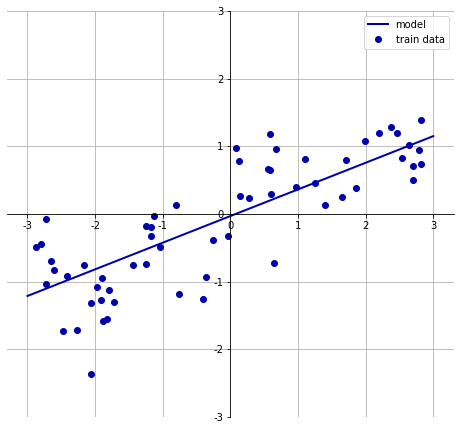

In [2]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀 (최소제곱법)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples = 60)# 샘플 60개 만듦
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

lr = LinearRegression().fit(X_train,y_train)

In [4]:
print("lr.coef_:",lr.coef_)# W (w0)
print("lr.intercept_:",lr.intercept_) # b (w1)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [5]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
#두개의 차이가 크면 overfitting

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [8]:
X,y = mglearn.datasets.load_extended_boston() #boston집값 데이터

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

<class 'numpy.ndarray'>


In [7]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))

#overfitting :데이터개수가 너무 작고, linear모델이 적합하지 않음

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


### 릿지 회귀

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [11]:
ridge10 = Ridge(alpha = 10).fit(X_train,y_train) #alpha = 람다 
#alpha가 클수록 규제를 높인다(일반화를 많이 한다 - 커브를 부드럽게)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [12]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
# 규제가 없다면 훈련데이터에만 최적화됨
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


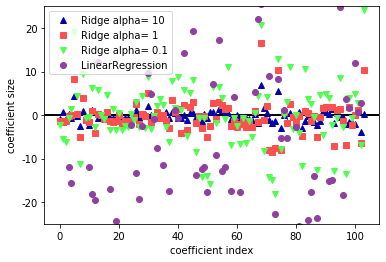

In [14]:
plt.plot(ridge10.coef_,"^",label = "Ridge alpha= 10")
plt.plot(ridge.coef_,"s",label = "Ridge alpha= 1")
plt.plot(ridge01.coef_,"v",label = "Ridge alpha= 0.1")
#일반화를 넓히면 coefficient 가 0에 가까워짐

plt.plot(lr.coef_,'o',label = "LinearRegression") #값의 범위가 크다
plt.xlabel("coefficient index")
plt.ylabel("coefficient size")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends

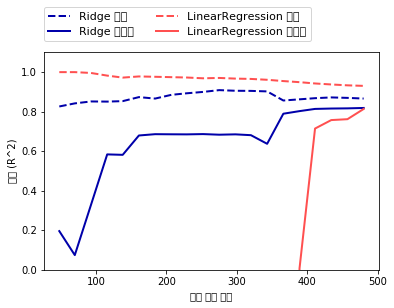

In [16]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("룬련 세트 점수: {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso.coef_ !=0)) #0이 아닌애들과의 sum
#실제로 특성의 값이 0이 되는 경우가 많음
#훈련세트에 안맞음 - underfitting

룬련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [20]:
#"max_iter" 기본 값을 증가시키지 않으면 max_iter값을 늘이라는 경고발생
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train,y_train)
print("룬련 세트 점수: {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso001.coef_ !=0))

룬련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [22]:
#"max_iter" 기본 값을 증가시키지 않으면 max_iter값을 늘이라는 경고발생
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train,y_train)
print("룬련 세트 점수: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso00001.coef_ !=0))

룬련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, 'coefficient size')

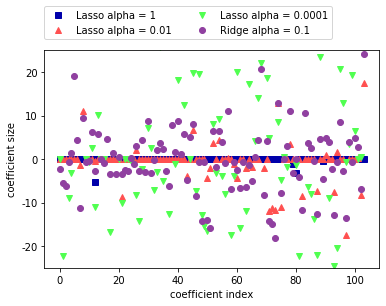

In [23]:
plt.plot(lasso.coef_,'s',label = "Lasso alpha = 1")
plt.plot(lasso001.coef_,'^',label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_,'v',label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_,'o',label = "Ridge alpha = 0.1")
plt.legend(ncol=2,loc = (0,1.05))
plt.ylim(-25,25)
plt.xlabel("coefficient index")
plt.ylabel("coefficient size")